In [44]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Loading Dataset

df=pd.read_csv("dataset/winequality-red.csv")

In [4]:
# view top 5 rows
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# View basic info about dataset
df["quality"]=df["quality"].astype(object)
df.info()

# converted the target column quality to object type from int(continuous)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


#   Exploratory Data Analysis


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

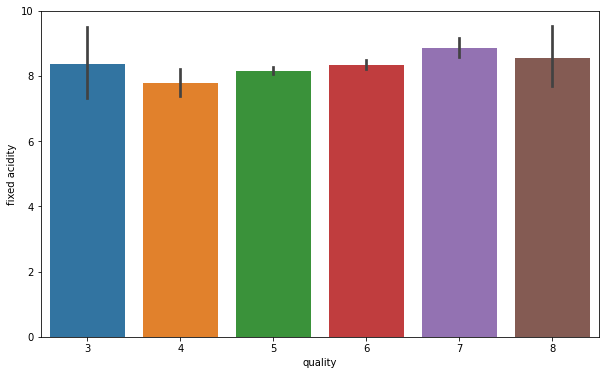

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

# It seems "fixed acidity " is not affecting the quality of wines, since   fixed acidity value is almost same all uality of wines 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

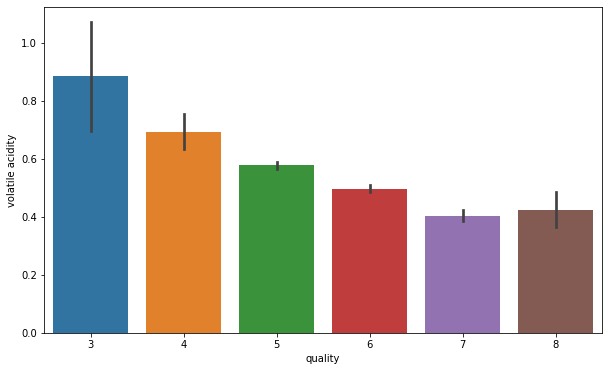

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

# Higher the quality higher the volatile acidity

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

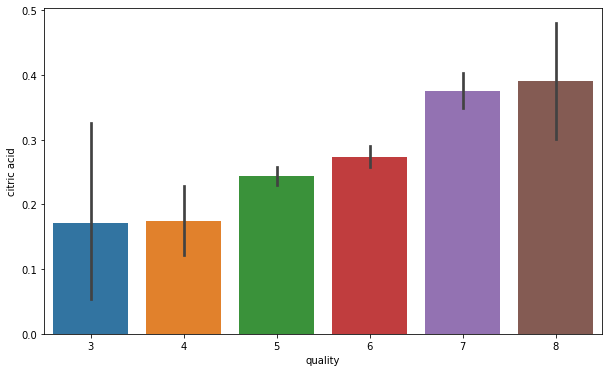

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

# Higher the citric acid higher the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

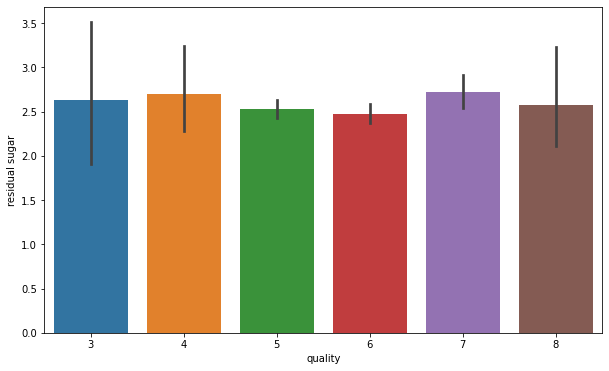

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

# Sugar level seems to be the same for all quality of wines

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

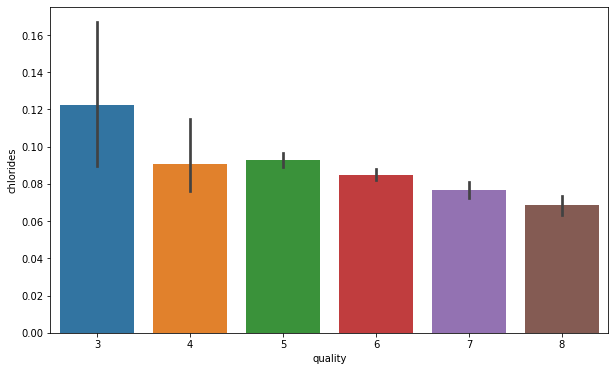

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)


#higher the quality of the wine lower the Composition of chloride 

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

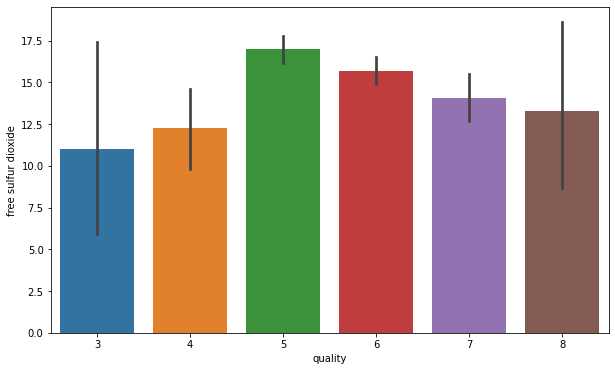

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

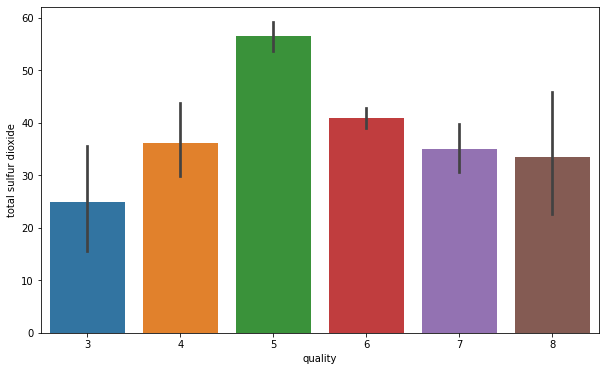

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

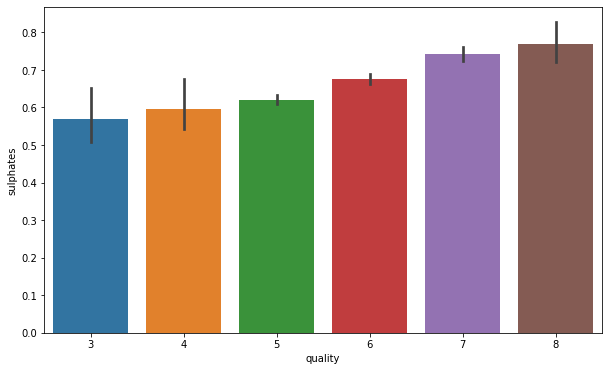

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

#Sulphates level goes higher with the quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

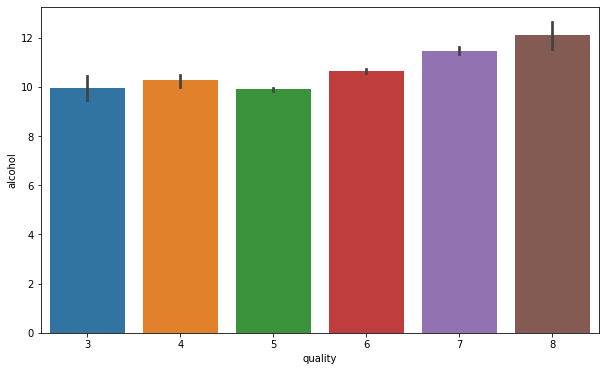

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

#Alcohol level also goes higher as the quality of wine increases

In [30]:
df.isna().sum()

# We do not have any NA values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
df["quality"].value_counts()

# We will now bin the target variable in such a way that wines with quality less 
# than 6.8 will be bad and greater than 6.8 will be good

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [36]:
bins=[2,6.8,8]
bined_quality=pd.cut(df["quality"],bins,labels=["bad","good"])

In [37]:
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(bined_quality)

In [39]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [40]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [41]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [42]:
#Standard scalar to independent variables
std_obj = StandardScaler()
X_train = std_obj.fit_transform(X_train)
X_test = std_obj.fit_transform(X_test)

#  Cross Validation

In [46]:
def cross_validation(x,y,params,cv_num=5,):
    model_dict={"DT":DecisionTreeClassifier,"RF":RandomForestClassifier,"SVC":SVC,"GLM":LogisticRegression}
    cv_scores={}
    for model_name,model_obj in model_dict.items():
        scores=cross_val_score(model_obj(**params[model_name]),x,y.values.ravel(),cv=cv_num)
        cv_scores[model_name]={"mean":scores.mean(),"std":scores.std()}
    return cv_scores

In [47]:
parameters={"DT":{},"RF":{},"SVC":{},"GLM":{}}
cross_validation(X_train,y_train,parameters)

{'DT': {'mean': 0.8722213324791801, 'std': 0.01722113818759415},
 'RF': {'mean': 0.9088524983984625, 'std': 0.010745349769538792},
 'SVC': {'mean': 0.8891936258808457, 'std': 0.006449992113475553},
 'GLM': {'mean': 0.8820427610506087, 'std': 0.010354093060455151}}

### Random Forest seems to be working good

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [49]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       425
           1       0.67      0.47      0.55        55

    accuracy                           0.91       480
   macro avg       0.80      0.72      0.75       480
weighted avg       0.90      0.91      0.91       480



In [50]:
confusion_matrix(y_test, pred_rfc)

array([[412,  13],
       [ 29,  26]], dtype=int64)